In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
productividad = pd.read_csv('garments_worker_productivity.csv')
productividad.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
productividad.shape

(1197, 15)

In [ ]:
productividad[productividad['actual_productivity']>1].shape

(37, 15)

In [ ]:
productividad = productividad.drop(productividad[productividad['actual_productivity']>1].index)
productividad.shape

(1160, 15)

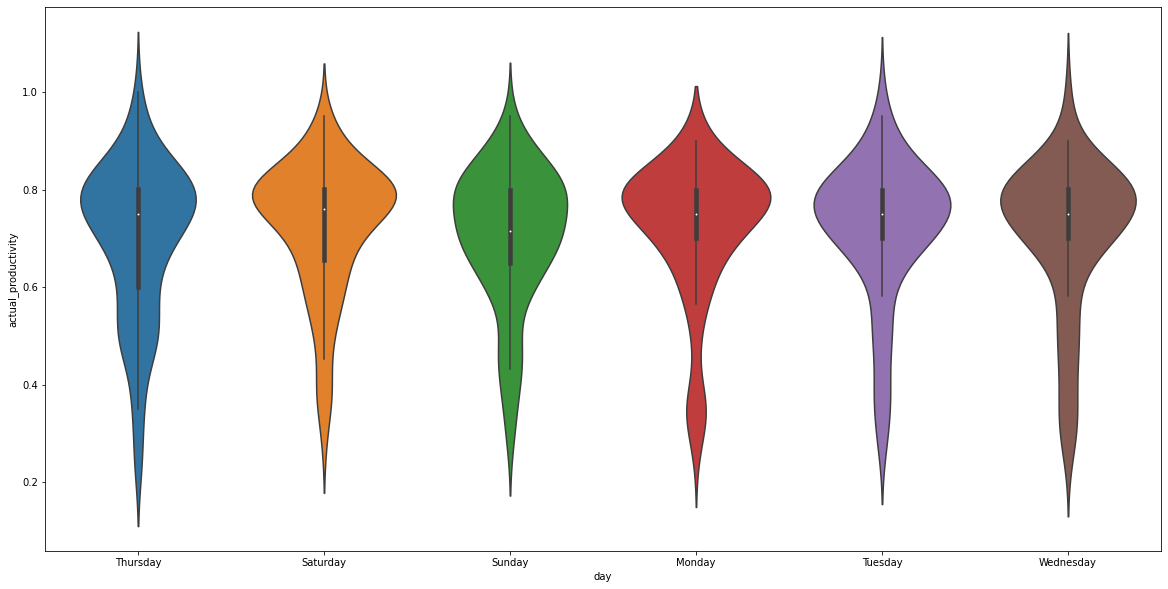

In [ ]:
pr_we = productividad[productividad['department']=='sweing']
plt.figure(figsize=(20,10))
sns.violinplot(data =pr_we ,x = 'day', y = 'actual_productivity')
plt.show()

In [ ]:
df = productividad[productividad['actual_productivity']>1]
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [ ]:
for department in productividad['department'].unique():
    print(department)

sweing
finishing


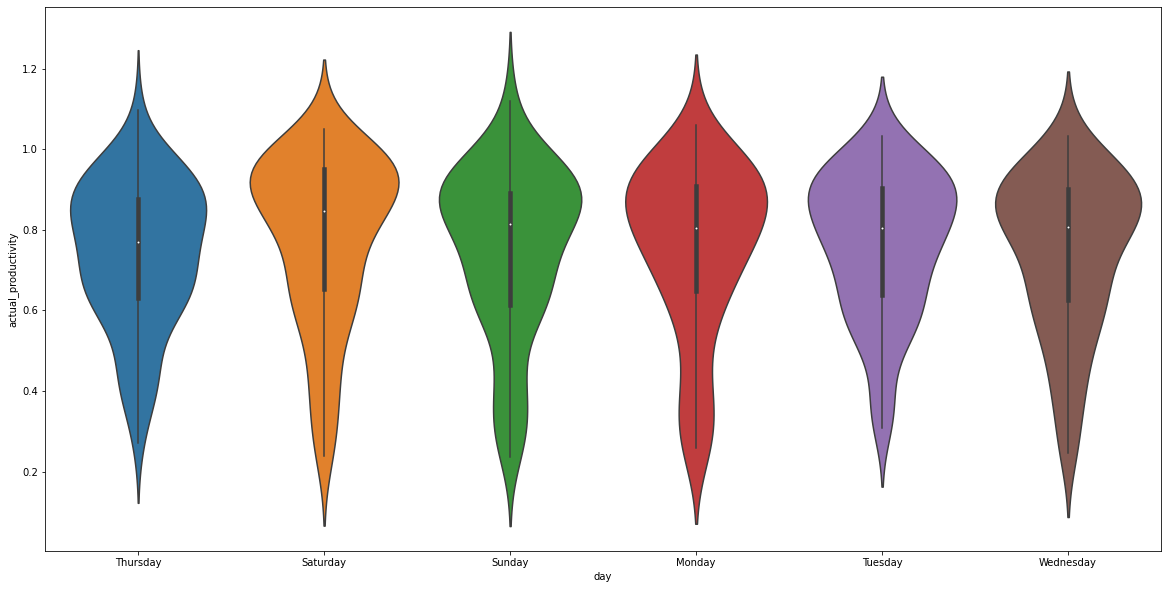

In [ ]:
pr_we1 = productividad[productividad['department']=='finishing']
plt.figure(figsize=(20,10))
sns.violinplot(data =pr_we1 ,x = 'day', y = 'actual_productivity')
plt.show()

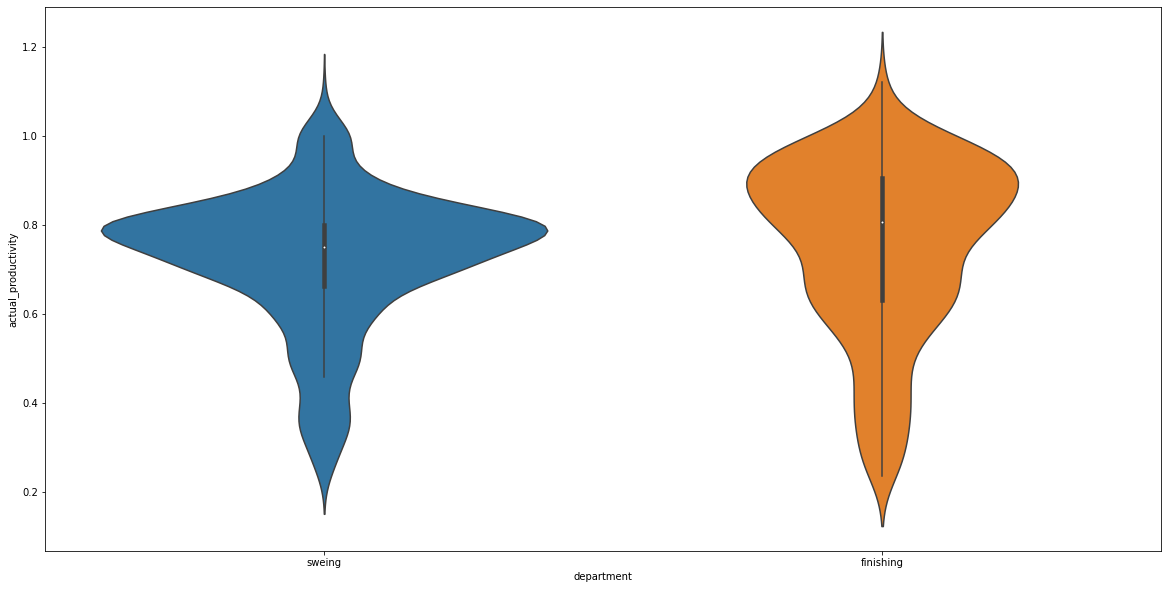

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(data =productividad ,x = 'department', y = 'actual_productivity')
plt.show()

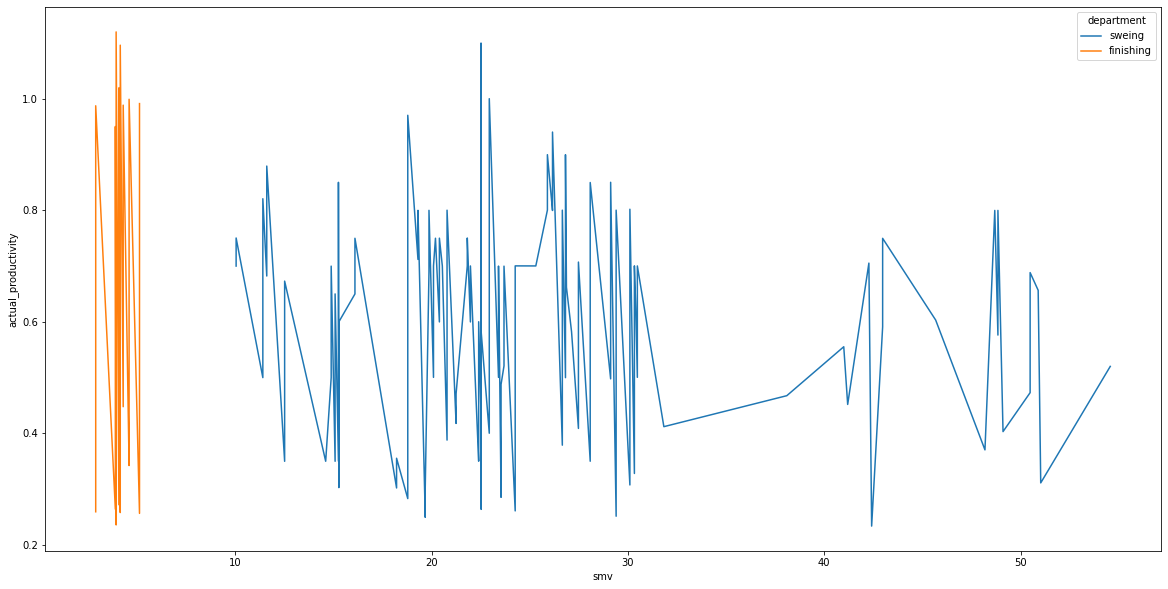

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data=productividad,x = 'smv', y = 'actual_productivity', hue='department', estimator=None)
plt.show()

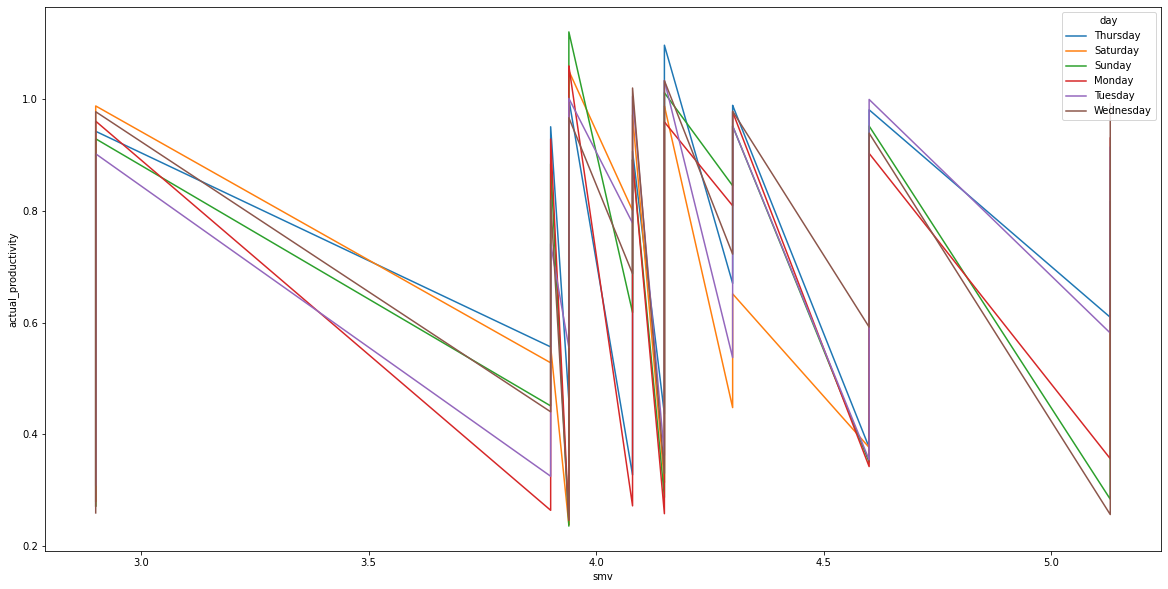

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(data=productividad[productividad['department']=='finishing'],x = 'smv', y = 'actual_productivity',hue = 'day',estimator=None)
plt.show()

In [ ]:
productividad.shape

(1197, 15)

Conocer los datos de la variable departamento

In [ ]:
productividad['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Se observa que en la variable __'department'__ hay un error de tipiado en los datos finishing

Por lo cual hay que hacer un tratamiento a esos datos, para corregir el error

In [ ]:
def whitespace_remover(dataframe):
    # iterando sobre las columnas
    for i in dataframe.columns:
          
        # comprobar el tipo de datos de cada columna
        if dataframe[i].dtype == 'object':
              
            # aplicando la función strip en la columna
            dataframe[i] = dataframe[i].map(str.strip)
        else:
              
            # si condn. es falso, entonces no hará nada.
            pass
  
# aplicando la función whitespace_remover en el marco de datos
whitespace_remover(productividad)
  
# printing dataframe
productividad.department.unique()


array(['sweing', 'finishing'], dtype=object)

Ya corregido el error que tenia en los datos se ara un analisis de datos exploratorio

Se vera cuantos trabajos hay en cada departamento:

In [ ]:
productividad.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

Se ve que en el departamento sweing(coser) lo cual indica que donde mas tiempo se pasa los trabajadores, por lo cual se debe dar un analisis a el departamento para tener mas conocimiento de lo que ocurre en tal departamento

<AxesSubplot:xlabel='department', ylabel='no_of_workers'>

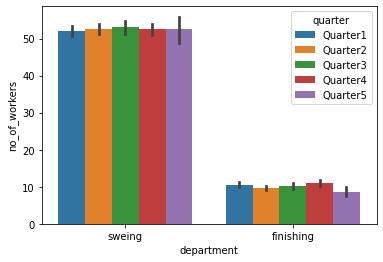

In [ ]:
sns.barplot(x='department', y='no_of_workers',hue='quarter',
 data=productividad)

Como ya se sabia en sweing hay mucho mas trabajo con respecto a finishing(acabado), y en los trimestres no baja la carga de trabajo, a diferencia del finishing que se ve que en el trimestre5 hay un claro descenso a respecto de los demas

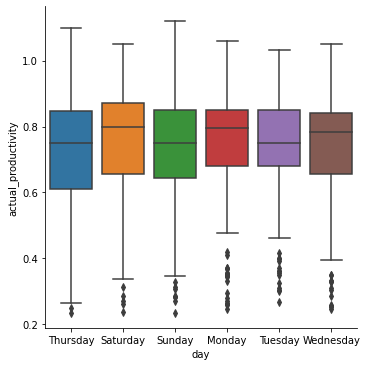

In [ ]:
sns.catplot(x="day", y="actual_productivity", kind="box", data=productividad)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

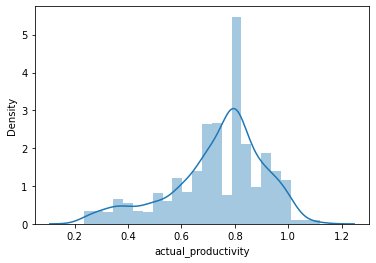

In [ ]:
sns.distplot(productividad['actual_productivity'])


Se ve que % de productividad tienen mayor concentracion entre el 0.6 y 1; pero tambien se que hay puntos que sobrepasan el 100% en algunos puntos
eso debe ser un error de tipieado ya como se sabe no se puede tener un porcentaje del 100%.
Hay algunos datos alrededor del 20% lo cual se ve que si hay productividad baja.

In [ ]:
productividad.groupby(['day']).agg(
    media_produccion = pd.NamedAgg(column='actual_productivity', aggfunc='mean'),
    mediana_producion =pd.NamedAgg(column='actual_productivity', aggfunc='median'))


,media_produccion,mediana_producion
day,,
Monday,0.735488,0.795417
Saturday,0.751929,0.800117
Sunday,0.728604,0.750651
Thursday,0.722641,0.750651
Tuesday,0.742701,0.750797
Wednesday,0.730462,0.783212


Se puede ver que la productividad el dia lunes tiene muchos puntos fuera del limite inferior pero a pesar de ello se puede ver que la media y su mediana estan a la par de los demas dias 

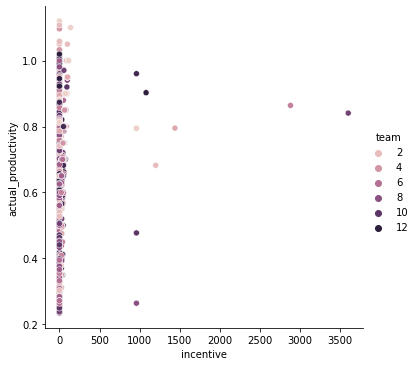

In [ ]:
sns.relplot(x="incentive", y="actual_productivity", hue="team", data=productividad)

Hay incentivos muy altos que no dejan apreciar bien los datos por lo cual se procedera a eliminar esos puntos para tener mas vision de la relacion del incentivo y la productividad

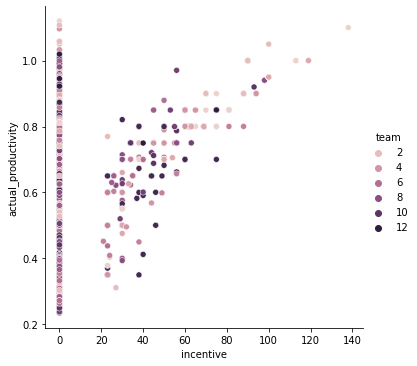

In [ ]:
produc_1 = productividad[productividad['incentive']<200]
sns.relplot(x="incentive", y="actual_productivity", hue="team", data=produc_1);

In [ ]:
produc_1['incentive'].quantile(0.50)

0.0

Los incentivos se ven que en su mayoria es muy bajo, pero conforme aumente se puede ver que ayuda a tener una mejor productividad. 
Ahora se quiere ver entre cual departamento son los que mejor incentivo tienen.

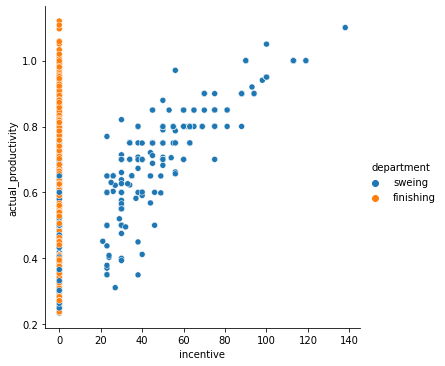

In [ ]:
sns.relplot(x="incentive", y="actual_productivity", hue="department", data=produc_1);

La mayoria de los incentivos se van para el departamento de __Sweing__ se puede inferir es por la importancia que tiene en la empresa la parte del cosido. Mientras que en el departamento de __Fishining__ es un trabajo inclusivo mas sencillo en comparacion con el otro departamento

Se logro arreglar el error te tipieado.

Ahora hallaremos la matriz de correlacion de los datos para conocer la relacion tiene las variables

<AxesSubplot:>

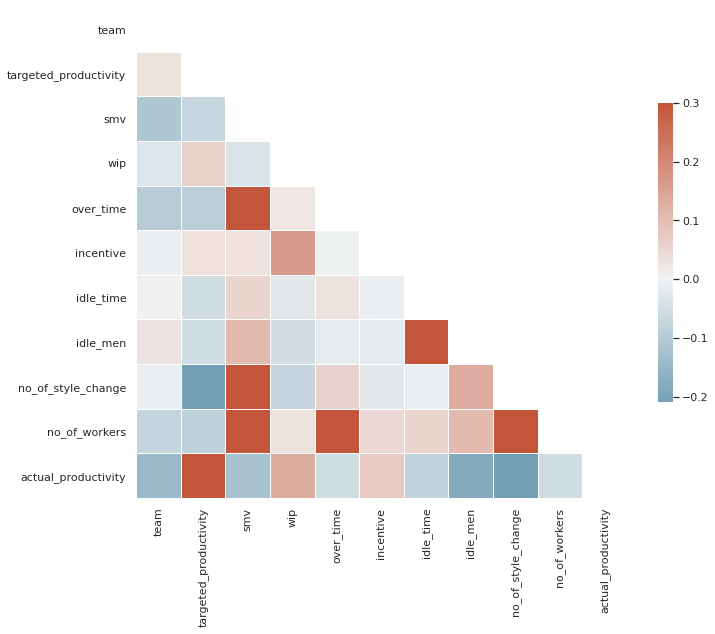

In [ ]:
sns.set_theme(style='white')
corr = productividad.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr,dtype=bool))
f,ax= plt.subplots(figsize = (11,11))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,mask= mask,cmap=cmap,vmax=.3,center=0,
            square=True,linewidths=.5,cbar_kws={'shrink':.5})

Hay que ver si en nuestra base de datos hay algun valor nulo por lo cual se usara la funcion __.isnull()__ pero para saber donde hay se le agrega la funcion __.any()__

In [ ]:
productividad.isnull().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

Se eliminara los valores nulos de la variable wip:

Se quiere saber cuantos datos tiene valores nulos

In [ ]:
productividad['wip'] = productividad['wip'].fillna(0)

Eliminamos los puntos nulos que hay en la variable wip

In [ ]:
productividad.groupby(
    ['quarter','department']
).agg(
    mean_produccion = pd.NamedAgg(column='actual_productivity', aggfunc='mean'),
    median_produccion = pd.NamedAgg(column='actual_productivity',aggfunc='median')
)

mean_produccion  median_produccion
quarter  department                                    
Quarter1 finishing          0.758482           0.805909
         sweing             0.746671           0.799963
Quarter2 finishing          0.764824           0.819271
         sweing             0.727200           0.799982
Quarter3 finishing          0.735793           0.734646
         sweing             0.685272           0.700633
Quarter4 finishing          0.713400           0.773721
         sweing             0.705725           0.750207
Quarter5 finishing          0.900174           0.971867
         sweing             0.758615           0.850170

Se genera una funcion para eliminar los espacios en blanco del mal tipiado de los datos

## Regresión Lineal

In [ ]:
data = productividad.loc[:,'team':'actual_productivity']

x = data.loc[:,'team':'no_of_workers']
y = data.actual_productivity

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3 , random_state=0
)

In [ ]:
x_train.isna().any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of team                     False
targeted_productivity    False
smv                      False
wip                      False
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
dtype: bool>

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)

In [ ]:
# La intercepcion de la ecucacion es:
lm.intercept_

0.30260659827822667

In [ ]:
print('Los coeficientes son:')
[(col,coef) for col , coef in 
    zip(x_train.columns, lm.coef_)]

Los coeficientes son:


[('team', -0.009471084434188847),
 ('targeted_productivity', 0.6874646741835985),
 ('smv', -0.007640940311913411),
 ('wip', 5.140648361712241e-06),
 ('over_time', -3.853776056272906e-06),
 ('incentive', 6.195137203398714e-05),
 ('idle_time', 0.0012340238142756754),
 ('idle_men', -0.0104887562176189),
 ('no_of_style_change', -0.040273958748029075),
 ('no_of_workers', 0.0037163059870802028)]

In [ ]:
preds = lm.predict(x_test)

Text(0.5, 1.0, 'Resultados de regresion lineal')

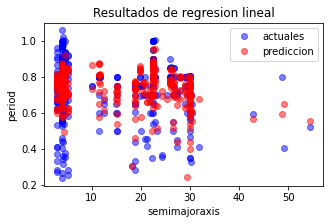

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
>>> axes.plot(
    x_test.smv, y_test, 'ob',
    label='actuales', alpha=0.5
)
axes.plot(
    x_test.smv, preds, 'or',
    label='prediccion', alpha=0.5
)
axes.set(xlabel='semimajoraxis', ylabel='period')
axes.legend()
axes.set_title('Resultados de regresion lineal')

Revisamos su correlacion para ver que tal bien nuestro modelo predice la verdadera relacion:

In [ ]:
np.corrcoef(y_test,preds) [0] [1]

0.5302093416713493

tiene una correlacion baja para tener una relacion mas precisa mejor es verlo en las metricas

In [ ]:
lm.score(x_test,y_test)

0.2801951395436575

La R^2 es muy baja 0.2802 por lo cual nuestro modelo de regresion no es confiable

Sacaremos el R^2 ajustado:

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,preds)

0.06895508392253569

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0a99772-3ae2-44e5-9f22-e270f72fea84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>